In [1]:
import numpy as np
import torch

from torch import nn
from torch.nn import functional as F
from torchsummary import summary
from PIL import Image
from torchvision import transforms, datasets
from tqdm import tqdm

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
dataset = datasets.CIFAR100(root='data/', train=True, download=True)


class MyOwnCifar(torch.utils.data.Dataset):
   
    def __init__(self, init_dataset, transform=None):
        self._base_dataset = init_dataset
        self.transform = transform

    def __len__(self):
        return len(self._base_dataset)

    def __getitem__(self, idx):
        img = self._base_dataset[idx][0]
        if self.transform is not None:
            img = self.transform(img)
        return img, self._base_dataset[idx][1]

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting data/cifar-100-python.tar.gz to data/


In [73]:
trans_actions = transforms.Compose([transforms.Resize(44),
                                    transforms.RandomCrop(32, padding=4), 
                                    transforms.ToTensor()])


def train_valid_split(Xt):
    X_train, X_test = train_test_split(Xt, test_size=0.05, random_state=13)
    return X_train, X_test

train_dataset, valid_dataset = train_valid_split(dataset)

train_dataset = MyOwnCifar(train_dataset, trans_actions)
valid_dataset = MyOwnCifar(valid_dataset, transforms.ToTensor())

In [74]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                          batch_size=128,
                          shuffle=True,
                          num_workers=2)
valid_loader = torch.utils.data.DataLoader(valid_dataset,
                          batch_size=128,
                          shuffle=False,
                          num_workers=1)

In [75]:
classes = ('beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 
           'sunflowers', 'tulips', 'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 	
           'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 'bed', 'chair', 'couch', 'table', 'wardrobe', 'bee', 'beetle', 
           'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf', 'bridge', 'castle', 'house', 'road', 'skyscraper',	
           'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 'fox', 'porcupine', 'possum', 
           'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman', 'crocodile', 'dinosaur', 'lizard', 
           'snake', 'turtle', 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple', 'oak', 'palm', 'pine', 'willow', 'bicycle', 'bus', 
           'motorcycle', 'pickup truck', 'train', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor')

In [76]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [81]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.dp_one = nn.Dropout(0.3)
        # self.dp_two = nn.Dropout(0.3)
        
        self.bn_one = torch.nn.BatchNorm2d(3) 
        self.conv_one = torch.nn.Conv2d(3, 32, 3, stride=1, padding=1)

        self.bn_two = torch.nn.BatchNorm2d(32) 
        self.conv_two = torch.nn.Conv2d(32, 64, 3, stride=1, padding=1)

        self.bn_three = torch.nn.BatchNorm2d(64)
        self.conv_three = torch.nn.Conv2d(64, 64, 3, stride=1, padding=1)

        self.bn_four = torch.nn.BatchNorm2d(64)
        self.conv_four = torch.nn.Conv2d(64, 128, 3, stride=1, padding=1)

        self.bn_five = torch.nn.BatchNorm2d(128)
        self.conv_five = torch.nn.Conv2d(128, 128, 3, stride=1, padding=1)

        self.bn_six = torch.nn.BatchNorm2d(128)
        self.conv_six = torch.nn.Conv2d(128, 256, 3, stride=1, padding=1)

        self.bn_seven = torch.nn.BatchNorm2d(256)
        self.conv_seven = torch.nn.Conv2d(256, 256, 3, stride=1, padding=1)

        self.bn_eigth = torch.nn.BatchNorm2d(256)
        # self.fc1 = torch.nn.Linear(1024, 512)
        # self.fc2 = torch.nn.Linear(512, 256)
        # self.avgpool = torch.nn.AdaptiveAvgPool2d((1, 1))
        self.out = torch.nn.Linear(1024, 100)
        
    def forward(self, x):
        x = self.bn_one(x)
        x = self.conv_one(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        
        x = self.bn_two(x)
        x = self.conv_two(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        
        x = self.bn_three(x)
        x = self.conv_three(x)
        x = F.relu(x)
        # x = F.max_pool2d(x, 2)

        x = self.bn_four(x)
        x = self.conv_four(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)

        x = self.bn_five(x)
        x = self.conv_five(x)
        x = F.relu(x)
        # x = F.max_pool2d(x, 2)

        x = self.bn_six(x)
        x = self.conv_six(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)

        x = self.bn_seven(x)
        x = self.conv_seven(x)
        x = F.leaky_relu(x, 0.1)
        # x = F.max_pool2d(x, 2)
        
        x = self.bn_eigth(x)
        # x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.dp_one(x)
        # x = self.fc1(x)
        # x = F.relu(x)
        # x = self.dp_two(x)
        # x = self.fc2(x)
        x = F.relu(x)

        return self.out(x)
       
net = Net().to(device)
print(net)

Net(
  (dp_one): Dropout(p=0.3, inplace=False)
  (bn_one): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_one): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn_two): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_two): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn_three): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_three): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn_four): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_four): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn_five): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_five): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn_six): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [82]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [83]:
from torchsummary import summary

summary(net.to(device), input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm2d-1            [-1, 3, 32, 32]               6
            Conv2d-2           [-1, 32, 32, 32]             896
       BatchNorm2d-3           [-1, 32, 16, 16]              64
            Conv2d-4           [-1, 64, 16, 16]          18,496
       BatchNorm2d-5             [-1, 64, 8, 8]             128
            Conv2d-6             [-1, 64, 8, 8]          36,928
       BatchNorm2d-7             [-1, 64, 8, 8]             128
            Conv2d-8            [-1, 128, 8, 8]          73,856
       BatchNorm2d-9            [-1, 128, 4, 4]             256
           Conv2d-10            [-1, 128, 4, 4]         147,584
      BatchNorm2d-11            [-1, 128, 4, 4]             256
           Conv2d-12            [-1, 256, 4, 4]         295,168
      BatchNorm2d-13            [-1, 256, 2, 2]             512
           Conv2d-14            [-1, 25

In [84]:
num_epochs = 20
net.train()

for epoch in range(num_epochs):  
    running_loss, running_items, running_right = 0.0, 0.0, 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        running_right += (labels == torch.max(outputs, 1)[1]).sum()
        
        # выводим статистику о процессе обучения
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            net.eval()
            
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}. ' \
                  f'Acc: {running_right / running_items:.3f}', end='. ')
            running_loss, running_items, running_right = 0.0, 0.0, 0.0

            test_running_right, test_running_total = 0.0, 0.0
            for i, data in enumerate(valid_loader):
            
                test_outputs = net(data[0].to(device))
                test_running_total += len(data[1])
                test_running_right += (data[1].to(device) == torch.max(test_outputs, 1)[1]).sum()
            
            print(f'Test acc: {test_running_right / test_running_total:.3f}')
        
        net.train()
        
print('Training is finished!')

Epoch [1/20]. Step [1/372]. Loss: 0.038. Acc: 0.008. Test acc: 0.013
Epoch [1/20]. Step [301/372]. Loss: 0.031. Acc: 0.095. Test acc: 0.098
Epoch [2/20]. Step [1/372]. Loss: 0.029. Acc: 0.078. Test acc: 0.099
Epoch [2/20]. Step [301/372]. Loss: 0.026. Acc: 0.184. Test acc: 0.110
Epoch [3/20]. Step [1/372]. Loss: 0.026. Acc: 0.180. Test acc: 0.124
Epoch [3/20]. Step [301/372]. Loss: 0.024. Acc: 0.246. Test acc: 0.155
Epoch [4/20]. Step [1/372]. Loss: 0.024. Acc: 0.250. Test acc: 0.181
Epoch [4/20]. Step [301/372]. Loss: 0.022. Acc: 0.292. Test acc: 0.210
Epoch [5/20]. Step [1/372]. Loss: 0.021. Acc: 0.289. Test acc: 0.202
Epoch [5/20]. Step [301/372]. Loss: 0.020. Acc: 0.324. Test acc: 0.236
Epoch [6/20]. Step [1/372]. Loss: 0.019. Acc: 0.375. Test acc: 0.226
Epoch [6/20]. Step [301/372]. Loss: 0.019. Acc: 0.354. Test acc: 0.260
Epoch [7/20]. Step [1/372]. Loss: 0.019. Acc: 0.430. Test acc: 0.244
Epoch [7/20]. Step [301/372]. Loss: 0.018. Acc: 0.381. Test acc: 0.269
Epoch [8/20]. Step [

## Предобученные сети

In [6]:
from torchvision import models

resnet50 = models.resnet50(pretrained=True)
print(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
from torchsummary import summary
summary(resnet50.to(device), input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

Замораживаем претренированную модель:

In [8]:
for param in list(resnet50.parameters())[:]:
    param.requires_grad = False

In [9]:
resnet50.fc = nn.Linear(2048, 100)

summary(resnet50.to(device), input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
       BatchNorm2d-2           [-1, 64, 16, 16]             128
              ReLU-3           [-1, 64, 16, 16]               0
         MaxPool2d-4             [-1, 64, 8, 8]               0
            Conv2d-5             [-1, 64, 8, 8]           4,096
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
            Conv2d-8             [-1, 64, 8, 8]          36,864
       BatchNorm2d-9             [-1, 64, 8, 8]             128
             ReLU-10             [-1, 64, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]          16,384
      BatchNorm2d-12            [-1, 256, 8, 8]             512
           Conv2d-13            [-1, 256, 8, 8]          16,384
      BatchNorm2d-14            [-1, 25

Перемещем модель и данные на целевой устройство:

In [10]:
resnet50 = resnet50.to(device)

Данные:

In [15]:
train_actions = transforms.Compose([transforms.Resize(256),
                                    transforms.RandomCrop(224, padding=4), 
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])
valid_transforms = transforms.Compose([transforms.Resize(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])


train_dataset, valid_dataset = train_valid_split(dataset)

train_dataset = MyOwnCifar(train_dataset, train_actions)
valid_dataset = MyOwnCifar(valid_dataset, valid_transforms)

In [16]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
valid_loader = torch.utils.data.DataLoader(valid_dataset,
                                           batch_size=128,
                                           shuffle=False,
                                           num_workers=1)

Нужно собрать список параметров для адаптации

In [17]:
params_to_update = []
for name, param in resnet50.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)


optimizer = torch.optim.Adam(params_to_update, lr=0.001)
criterion = nn.CrossEntropyLoss()

Учим:

In [18]:
num_epochs = 10
resnet50.train()

for epoch in range(num_epochs):  
    running_loss, running_items, running_right = 0.0, 0.0, 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data[0].to(device), data[1].to(device)

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        running_right += (labels == torch.max(outputs, 1)[1]).sum()
        
        # выводим статистику о процессе обучения
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            resnet50.eval()
            
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}. ' \
                  f'Acc: {running_right / running_items:.3f}', end='. ')
            running_loss, running_items, running_right = 0.0, 0.0, 0.0

            test_running_right, test_running_total = 0.0, 0.0
            for i, data in enumerate(valid_loader):
            
                test_outputs = resnet50(data[0].to(device))
                test_running_total += len(data[1])
                test_running_right += (data[1].to(device) == torch.max(test_outputs, 1)[1]).sum()
            
            print(f'Test acc: {test_running_right / test_running_total:.3f}')

        resnet50.train()
        
print('Training is finished!')

Epoch [1/10]. Step [1/372]. Loss: 0.036. Acc: 0.008. Test acc: 0.009
Epoch [1/10]. Step [301/372]. Loss: 0.020. Acc: 0.395. Test acc: 0.512
Epoch [2/10]. Step [1/372]. Loss: 0.013. Acc: 0.562. Test acc: 0.509
Epoch [2/10]. Step [301/372]. Loss: 0.013. Acc: 0.537. Test acc: 0.549
Epoch [3/10]. Step [1/372]. Loss: 0.014. Acc: 0.547. Test acc: 0.540
Epoch [3/10]. Step [301/372]. Loss: 0.012. Acc: 0.564. Test acc: 0.564
Epoch [4/10]. Step [1/372]. Loss: 0.011. Acc: 0.625. Test acc: 0.559
Epoch [4/10]. Step [301/372]. Loss: 0.012. Acc: 0.580. Test acc: 0.567
Epoch [5/10]. Step [1/372]. Loss: 0.011. Acc: 0.609. Test acc: 0.561
Epoch [5/10]. Step [301/372]. Loss: 0.012. Acc: 0.592. Test acc: 0.568
Epoch [6/10]. Step [1/372]. Loss: 0.010. Acc: 0.602. Test acc: 0.572
Epoch [6/10]. Step [301/372]. Loss: 0.011. Acc: 0.594. Test acc: 0.578
Epoch [7/10]. Step [1/372]. Loss: 0.011. Acc: 0.633. Test acc: 0.562
Epoch [7/10]. Step [301/372]. Loss: 0.011. Acc: 0.603. Test acc: 0.586
Epoch [8/10]. Step [

In [19]:
resnet50.eval()
for data in valid_loader:
  test_outputs = resnet50(data[0].to(device))
  label = data[1].to(device) 
  predict = torch.max(test_outputs, 1)[1]
  break
print(predict)
print(label)
print((predict == label).sum()/predict.shape[0])


tensor([88, 75, 48, 90, 88,  3, 74, 86, 64,  0, 72, 12, 87, 58, 76, 44, 49, 77,
        93, 43, 30, 21, 98, 60, 13, 87, 89, 54, 36,  7, 64, 94, 69, 71, 91, 43,
        22, 58, 14, 81, 44,  3, 29, 10, 62, 79, 89, 31, 89, 78, 91,  8, 90, 52,
        67, 39,  6, 17, 59, 52, 17,  5, 41, 52, 53, 10, 25, 98, 66, 86, 43, 58,
        58, 49, 48, 48,  5, 83, 48, 38, 57,  4, 61, 98, 24, 13, 85,  7, 26, 93,
        81, 98, 49, 55, 40, 21, 10, 71, 69, 65, 66, 17, 78, 53, 53, 83, 29, 67,
        98, 52, 89, 93, 14, 49, 69, 77, 82, 15, 61,  4, 28, 54, 17,  5, 17, 79,
        38, 41], device='cuda:0')
tensor([88, 97,  8, 90, 31, 72, 65, 87, 64,  0,  3, 12, 87, 19, 76, 44, 49, 77,
        93, 15, 30, 21, 46, 60, 90, 87, 89, 54, 36, 79, 65, 94, 69, 49, 91, 19,
        22, 13, 14, 37, 44, 72, 50, 10, 53, 79, 89, 55, 15, 78,  1, 98, 13, 59,
         4, 39,  6, 17, 33, 52, 76, 97, 41, 47, 53, 10, 85, 98, 74, 86, 43, 41,
        58, 49, 48, 48, 25, 70, 48, 38, 54, 66, 61, 46, 24, 13, 90,  7, 27, 93,
      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


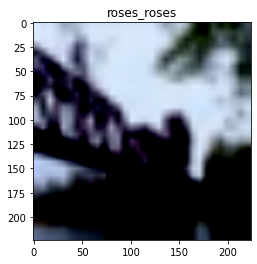

In [20]:
N = 11
plt.imshow(data[0][N,:,:,:].permute(1, 2, 0)/data[0][N,:,:,:].max())
plt.title(classes[label[N]]+'_'+classes[predict[N]])
plt.show()

## Аугментация данных

### Модуль transforms

Так как очень много работ связано непосредственно с изображениями, то у нас зачастую бывает что изображений либо мало, либо мы их должны как-то преобразовывать, либо мы хотим как-то расширить наш датасет. Тогда мы можем воспользоваться методами transforms, реализованным в библиотеке torchvision. 

Какие у него особенности?
 - Не со всеми форматами изображений он работает. Нам нужно преобразовывать наши изображения в формат изображений библиотеки PIL
 

https://pytorch.org/vision/stable/transforms.html

In [11]:
from scipy import misc
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt



In [12]:
train_actions = transforms.Compose([transforms.Resize(256),
                                    transforms.RandomCrop(224, padding=4),
                                    transforms.RandomRotation(degrees=90),
                                    transforms.ColorJitter(brightness=2, contrast=2),
                                    transforms.CenterCrop(size=224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])
valid_transforms = transforms.Compose([transforms.Resize(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])

train_dataset, valid_dataset = train_valid_split(dataset)

train_dataset = MyOwnCifar(train_dataset, train_actions)
valid_dataset = MyOwnCifar(valid_dataset, valid_transforms)

In [13]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
valid_loader = torch.utils.data.DataLoader(valid_dataset,
                                           batch_size=128,
                                           shuffle=False,
                                           num_workers=1)

In [14]:
params_to_update = []
for name, param in resnet50.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)


optimizer = torch.optim.Adam(params_to_update, lr=0.001)
criterion = nn.CrossEntropyLoss()

In [15]:
num_epochs = 10
resnet50.train()

for epoch in range(num_epochs):  
    running_loss, running_items, running_right = 0.0, 0.0, 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data[0].to(device), data[1].to(device)

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        running_right += (labels == torch.max(outputs, 1)[1]).sum()
        
        # выводим статистику о процессе обучения
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            resnet50.eval()
            
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}. ' \
                  f'Acc: {running_right / running_items:.3f}', end='. ')
            running_loss, running_items, running_right = 0.0, 0.0, 0.0

            test_running_right, test_running_total = 0.0, 0.0
            for i, data in enumerate(valid_loader):
            
                test_outputs = resnet50(data[0].to(device))
                test_running_total += len(data[1])
                test_running_right += (data[1].to(device) == torch.max(test_outputs, 1)[1]).sum()
            
            print(f'Test acc: {test_running_right / test_running_total:.3f}')

        resnet50.train()
        
print('Training is finished!')

Epoch [1/10]. Step [1/372]. Loss: 0.036. Acc: 0.016. Test acc: 0.010
Epoch [1/10]. Step [301/372]. Loss: 0.031. Acc: 0.123. Test acc: 0.254
Epoch [2/10]. Step [1/372]. Loss: 0.029. Acc: 0.195. Test acc: 0.256
Epoch [2/10]. Step [301/372]. Loss: 0.027. Acc: 0.194. Test acc: 0.332
Epoch [3/10]. Step [1/372]. Loss: 0.027. Acc: 0.156. Test acc: 0.329
Epoch [3/10]. Step [301/372]. Loss: 0.026. Acc: 0.218. Test acc: 0.335
Epoch [4/10]. Step [1/372]. Loss: 0.025. Acc: 0.234. Test acc: 0.329
Epoch [4/10]. Step [301/372]. Loss: 0.025. Acc: 0.228. Test acc: 0.362
Epoch [5/10]. Step [1/372]. Loss: 0.025. Acc: 0.211. Test acc: 0.344
Epoch [5/10]. Step [301/372]. Loss: 0.025. Acc: 0.233. Test acc: 0.352
Epoch [6/10]. Step [1/372]. Loss: 0.025. Acc: 0.258. Test acc: 0.327
Epoch [6/10]. Step [301/372]. Loss: 0.025. Acc: 0.241. Test acc: 0.379
Epoch [7/10]. Step [1/372]. Loss: 0.025. Acc: 0.234. Test acc: 0.338
Epoch [7/10]. Step [301/372]. Loss: 0.025. Acc: 0.244. Test acc: 0.376
Epoch [8/10]. Step [

In [16]:
resnet50.eval()
for data in valid_loader:
  test_outputs = resnet50(data[0].to(device))
  label = data[1].to(device) 
  predict = torch.max(test_outputs, 1)[1]
  break
print(predict)
print(label)
print((predict == label).sum()/predict.shape[0])

tensor([88, 48,  8, 90, 31, 42, 74, 86, 64, 83, 43, 18, 87, 19, 76, 44, 69, 44,
        93, 43, 30, 48, 98, 60, 90, 89, 89, 54, 36,  8, 66, 94, 69, 48, 91, 43,
        22, 13, 14, 37, 44, 43, 44, 61, 53, 79, 89, 66, 89, 99, 93, 89, 89, 59,
        74, 39, 53, 17, 66, 47, 13, 44, 41, 59, 53, 53, 89, 98, 64, 86, 43, 89,
        89, 30, 48, 86,  5, 92, 48, 38, 53, 42, 61, 19, 24, 13, 44, 79, 44, 93,
        39, 97, 93, 43, 86, 26, 61, 12, 86, 38, 39, 17, 42, 53, 53, 83, 89, 95,
        43, 59, 41, 93, 92, 49, 69, 77, 82, 44, 61, 43, 61, 54, 66,  5, 13, 42,
        38, 41], device='cuda:0')
tensor([88, 97,  8, 90, 31, 72, 65, 87, 64,  0,  3, 12, 87, 19, 76, 44, 49, 77,
        93, 15, 30, 21, 46, 60, 90, 87, 89, 54, 36, 79, 65, 94, 69, 49, 91, 19,
        22, 13, 14, 37, 44, 72, 50, 10, 53, 79, 89, 55, 15, 78,  1, 98, 13, 59,
         4, 39,  6, 17, 33, 52, 76, 97, 41, 47, 53, 10, 85, 98, 74, 86, 43, 41,
        58, 49, 48, 48, 25, 70, 48, 38, 54, 66, 61, 46, 24, 13, 90,  7, 27, 93,
      

## Домашнее задание

1. Обучите CNN (самописная) на CIFAR-100.
2. Обучите CNN на CIFAR-100 через дообучение ImageNet Resnet-50.
3. *Обучите CNN на CIFAR-100 через дообучение ImageNet Resnet-50 с аугментацией данных.
4. Сравните результаты обучения на эквивалентном числе эпох.